 ## Image Resizing

Image Resizing refers to the process of changing the dimensions of an image. This can involve either enlarging or reducing the size of an image while preserving its content. Resizing is often used in image processing to make images fit specific dimensions for display on different devices or for further analysis. The cv2.resize() function is used for this task. Here:

- cv2.resize(): Resizes the image to new dimensions.
- cv2.INTER_CUBIC: Provides high-quality enlargement. Better for upscaling, Zoom image.
- cv2.INTER_AREA: Works best for downscaling. Better for downscaling, Zoom out image.

old height: 225, old width: 225
new height: 675, new width: 675
new height1: 75, new width1: 75


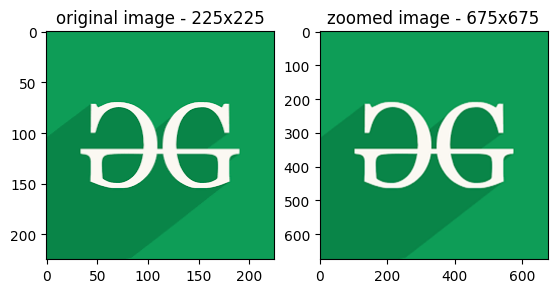

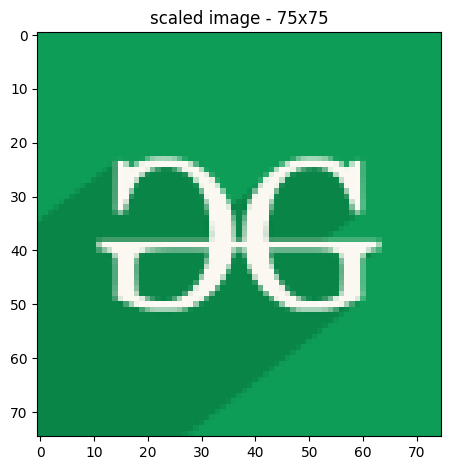

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('img_1.png')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

scale_factor_1 = 3.0
scale_factor_2 = 1 / 3.0

height, width = rgb_image.shape[:2]

new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)
print("old height: {}, old width: {}".format(height, width))
print("new height: {}, new width: {}".format(new_height, new_width))
zoomed_image = cv2.resize(rgb_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)
print("new height1: {}, new width1: {}".format(new_height1, new_width1))

# for downscaling inter_area is good choice
scaled_image = cv2.resize(rgb_image, (new_width1, new_height1), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(rgb_image), plt.title(f'original image - {height}x{width}')
plt.subplot(132), plt.imshow(zoomed_image), plt.title(f'zoomed image - {new_height}x{new_width}')
plt.show(133), plt.imshow(scaled_image), plt.title(f'scaled image - {new_height1}x{new_width1}')
plt.tight_layout()
plt.show()

## Image Rotation

Images can be rotated to any degree clockwise or anticlockwise using image rotation. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor. Here:
- cv2.getRotationMatrix2D() : generates the transformation matrix.
- cv2.warpAffine() : applies the rotation.
- A positive angle rotates the image clockwise; a negative angle rotates it counterclockwise.
    The scale factor adjusts the image size.

image shape: (225, 225, 3)
rotated matrix: [[  0.8660254    0.5        -40.99484522]
 [ -0.5          0.8660254   71.00515478]]


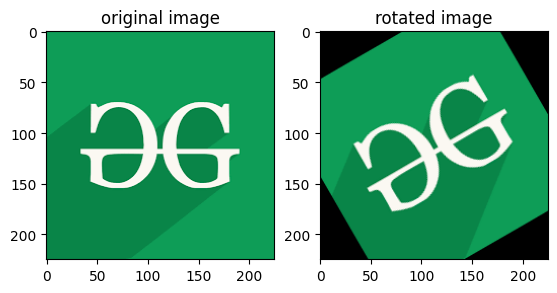

In [22]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img_1.png')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("image shape: {}".format(rgb_image.shape))
# find center from width and height
center = (rgb_image.shape[1] // 2, rgb_image.shape[0] // 2)

angle = 30
scale = 1

rotated_matrix = cv2.getRotationMatrix2D(center, angle, scale) # generates the transformation matrix.
print("rotated matrix: {}".format(rotated_matrix))
rotated_image = cv2.warpAffine(rgb_image, rotated_matrix, (rgb_image.shape[1], rgb_image.shape[0])) #image rotation
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(rgb_image), plt.title('original image')
plt.subplot(132), plt.imshow(rotated_image), plt.title('rotated image')
plt.show()

## 3. Image Translation

Image Translation is the process of moving an image from one position to another within a specified frame of reference. This shift can occur along the x-axis (horizontal movement) and y-axis (vertical movement) without altering the content or orientation of the image. Here:
- cv2.warpAffine() shifts the image based on translation values.
- tx, ty define the movement along the x and y axes.

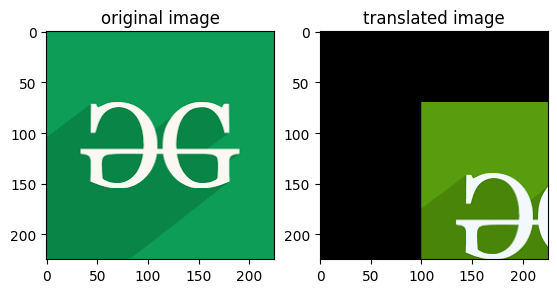

In [23]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img_1.png')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width, height = rgb_image.shape[:2]

tx, ty = 100, 70
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(img, translation_matrix, (width, height))
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(rgb_image), plt.title('original image')
plt.subplot(132), plt.imshow(translated_image), plt.title('translated image')
plt.show()


## Image Shearing

Image Shearing is a geometric transformation that distorts or skews an image along one or both axes. This operation slants the image creating a shear effect without changing its area or shape. Shearing can be applied to make the image appear as if it’s being stretched or compressed in a particular direction. Here:
 - shear_x, shear_y control the degree of skewing.
 - cv2.warpAffine() applies the transformation.

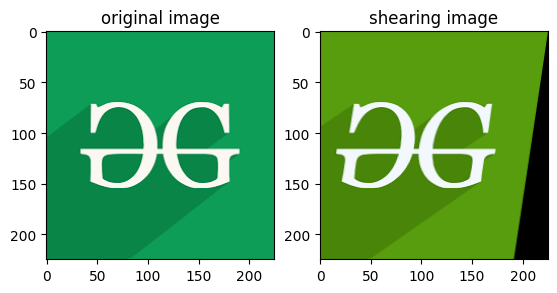

In [25]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img_1.png')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width, height = rgb_image.shape[:2]
shearX, shearY = -0.15, 0
translation_matrix = np.float32([[1, shearX, 0], [0, 1, shearY]])
translated_image = cv2.warpAffine(img, translation_matrix, (width, height))
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(rgb_image), plt.title('original image')
plt.subplot(132), plt.imshow(translated_image), plt.title('shearing image')
plt.show()

## Edge detection of Image

Edge detection is used to find sharp edges withing image to find different objects and boundaries within a image. Canny Edge Detection is a popular edge detection method. Here:
- cv2.GaussianBlur(): Removes noise through Gaussian smoothing.
- cv2.Sobel(): Computes the gradient of the image.
- cv2.Canny(): Applies non-maximum suppression and hysteresis thresholding to detect edges.

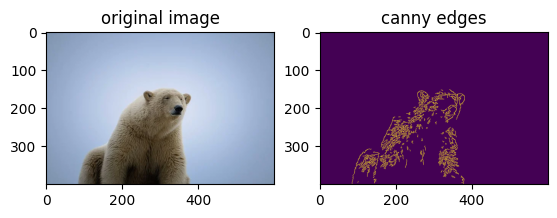

In [29]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img_4.png')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(rgb_image, 100, 200)
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(rgb_image), plt.title('original image')
plt.subplot(132), plt.imshow(edges), plt.title('canny edges')
plt.show()

Image Blurring

Image Blurring reduces image detail by averaging pixel values. Here:

- cv2.GaussianBlur(): Smooths using a Gaussian kernel.
- cv2.medianBlur(): Replaces pixels with the median value in a neighborhood..
- cv2.bilateralFilter(): Preserves edges while blurring.

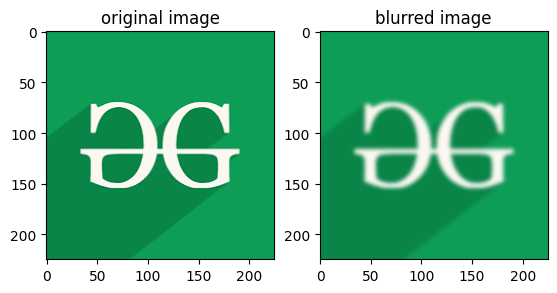

In [30]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img_1.png')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(rgb_image, (11, 11), 0)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(rgb_image), plt.title('original image')
plt.subplot(132), plt.imshow(blurred), plt.title('blurred image')
plt.show()
